# IMPORTING REQUIRED LIBRARY API'S

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from pandas.tools.plotting import scatter_matrix
from sklearn import svm, cross_validation
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV
import itertools
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

# LOAD DATASET
<li> I uesd numpy array to import the data from the datasets using genfromtxt
<li> For simplicity in calculations I converted the numpy array to DataFrame

In [20]:
#fname variable to store the path of the txt file
fname = '/Users/anishine912/Downloads/ML Exam/classification_data2.txt'
data = np.genfromtxt(fname)

In [21]:
df = pd.DataFrame(data=data[1:,0:], columns = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asym', 'groove_length', 'type'])

# DATA EXPLORATION

In [22]:
#The starting entries from the dataset
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [23]:
y = df.type.values      #storing the type in y as type is target value
x=df.drop(['type'],axis=1).values
x_df=df.drop(['type'],axis=1) #dropping type from x as it is not needed in the trainin sample
x_scaled=scale(x)

In [24]:
#x.count()

In [25]:
#computing the correlation amongst the attributes
df.corr()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
kernel_length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
kernel_width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asym,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove_length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


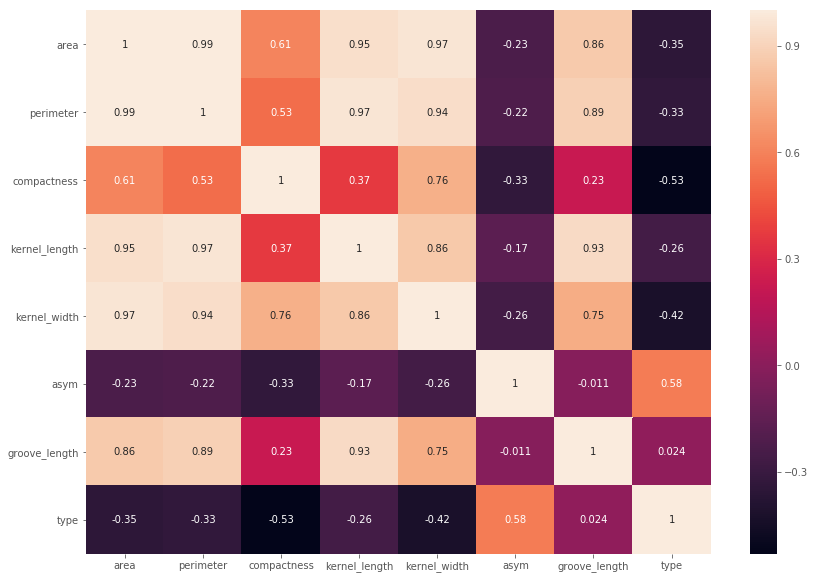

In [26]:
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize = (14,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)
plt.show()

In [12]:
df.type.value_counts()

3.0    70
2.0    70
1.0    70
Name: type, dtype: int64

In [27]:
print('Each class type distribution :', 70/210.0)

Each class type distribution : 0.3333333333333333


### EDA - Exploratory Data Analysis
Learn about the data :
Things to learn - 
<li> Is it Categorical?
<li> If not what are the min, max and avgerage values?
<li> If it is... what are the categories
<li> are there any missing values?
<li> Something about the distribution of the variable

In [28]:
#descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# VISUALIZATION 

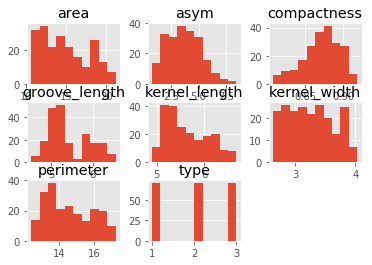

In [16]:
df.hist()
plt.show()

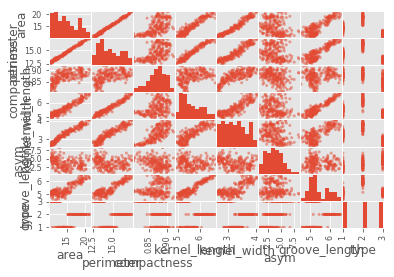

In [17]:
scatter_matrix(df)
plt.show()

### No null/missing values

# FUNCTION for PLOT of confusion matrix
                                              _ref from sklearn examples

### The following function calculates the confusion matrix and normalizes that matrix as well, and then plots a figure to show the matrix distributions as per the confusion matrix

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# LOGISTIC REGRESSION

### Perfroms the logistic regression using LogisticRegression()

In [30]:
#data-split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
model = LogisticRegression(penalty = 'l1')
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [34]:
scores = cross_val_score(model, x, y , cv = 5)
print ('accuracy : ',np.mean(scores) )
Y = np.array([1.0, 2.0, 3.0])

accuracy :  0.947619047619


Confusion matrix, without normalization
[[11  0  0]
 [ 0 14  0]
 [ 1  0 16]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.06  0.    0.94]]


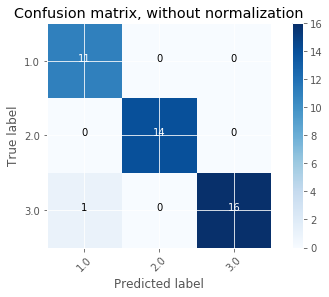

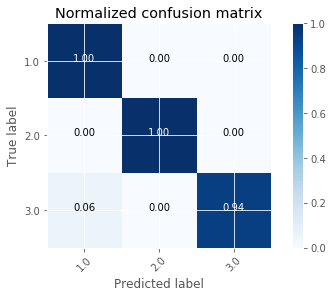

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### The plots show the distribution of prediction in the confusion matrix

# SOFT MARGIN SVM

<li> Soft margin svm is basically any commonly used svm function
<li> When C = defaultvalue = 1.0 the svm is soft margin

In [37]:
linear_svc = svm.SVC(kernel='linear')
scores = cross_val_score(linear_svc, x, y, cv = 5)
print ('accuracy : ',np.mean(scores) )
linear_svc.fit(x_train, y_train)
pred = linear_svc.predict(x_test)

accuracy :  0.9


Confusion matrix, without normalization
[[ 9  0  2]
 [ 0 14  0]
 [ 2  0 15]]
Normalized confusion matrix
[[ 0.82  0.    0.18]
 [ 0.    1.    0.  ]
 [ 0.12  0.    0.88]]


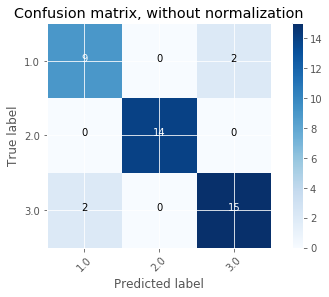

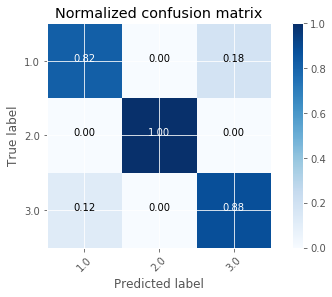

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Polynomial soft margin svm has a given coefficient , gamma

In [43]:
poly_svc = svm.SVC(kernel='poly', gamma=5)
scores = cross_val_score(poly_svc, x, y, cv = 5)
print ('accuracy : ',np.mean(scores) )
poly_svc.fit(x_train, y_train)
pred = poly_svc.predict(x_test)

accuracy :  0.933333333333


Confusion matrix, without normalization
[[11  0  0]
 [ 0 14  0]
 [ 3  0 14]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.18  0.    0.82]]


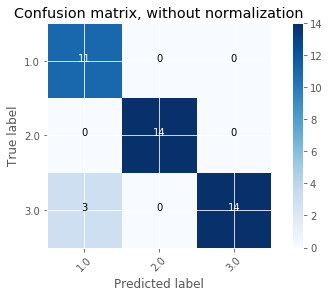

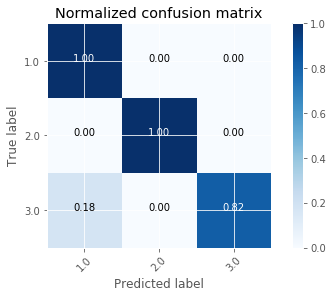

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### RBF soft margin takes the value of 5 for gamma from the given pool

In [45]:
rbf_svc = svm.SVC(kernel='rbf', gamma=1)
scores = cross_val_score(rbf_svc, x, y, cv = 5)
print ('accuracy : ',np.mean(scores) )
rbf_svc.fit(x_train, y_train)
pred = rbf_svc.predict(x_test)

accuracy :  0.880952380952


Confusion matrix, without normalization
[[ 9  0  2]
 [ 1 13  0]
 [ 1  0 16]]
Normalized confusion matrix
[[ 0.82  0.    0.18]
 [ 0.07  0.93  0.  ]
 [ 0.06  0.    0.94]]


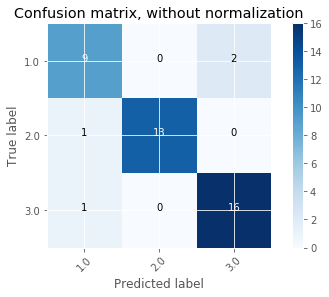

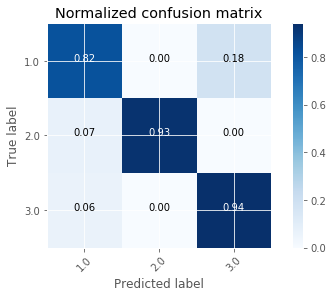

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# HARD MARGIN SVM

<li>Hard margin svm has large penalties for boundary violatins
<li>I choose a high value of C to increse the penalization
<li>For some higher values of C the svm fails 
<li>I have considered C = 1000 for all the kernels
<li>Another thing is that changes in the maxiterations also can affect the Hard margin SVM 

In [47]:
linear_svc = svm.SVC(kernel='linear',C=1000)
scores = cross_val_score(linear_svc, x, y, cv = 5)
print ('accuracy : ',np.mean(scores) )
linear_svc.fit(x_train, y_train)
pred = linear_svc.predict(x_test)

accuracy :  0.952380952381


Confusion matrix, without normalization
[[11  0  0]
 [ 0 14  0]
 [ 2  0 15]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.12  0.    0.88]]


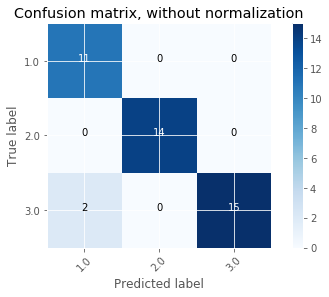

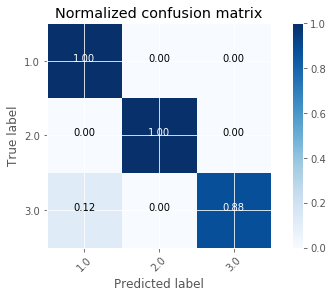

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [52]:
poly_svc = svm.SVC(kernel='poly', C=1000)
scores = cross_val_score(poly_svc, x, y, cv = 5)
print ('accuracy : ',np.mean(scores) )
poly_svc.fit(x_train, y_train)
pred = poly_svc.predict(x_test)

accuracy :  0.933333333333


Confusion matrix, without normalization
[[11  0  0]
 [ 0 14  0]
 [ 3  0 14]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.18  0.    0.82]]


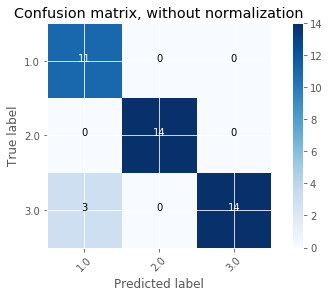

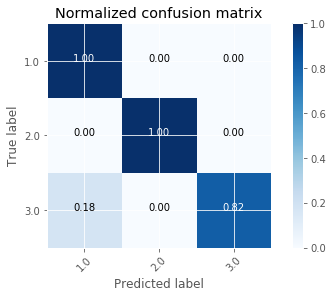

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [54]:
rbf_svc = svm.SVC(kernel='rbf', C=1000)
scores = cross_val_score(rbf_svc, x, y, cv = 5)
print ('accuracy : ',np.mean(scores) )
rbf_svc.fit(x_train, y_train)
pred = rbf_svc.predict(x_test)

accuracy :  0.919047619048


Confusion matrix, without normalization
[[11  0  0]
 [ 0 14  0]
 [ 1  0 16]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.06  0.    0.94]]


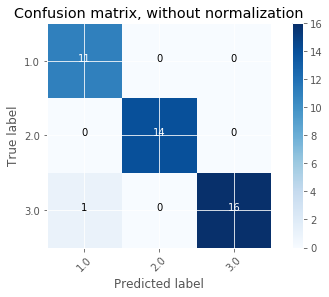

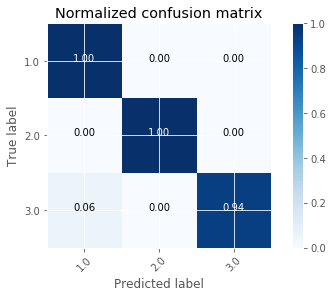

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# KERNELIZED RIDGE REGRESSION

In [56]:
linear = KernelRidge(kernel = 'linear', gamma = None, degree = None, coef0 = 1, kernel_params = None, alpha = 1)
linear.fit(x_train, y_train)
linear_pred = linear.predict(x_test)
confusion_matrix(y_test, linear_pred.round())

array([[ 7,  4,  0],
       [ 1, 12,  1],
       [ 0,  7, 10]])

In [63]:
from sklearn.metrics import r2_score
print ('R_square score :', r2_score(y_test,linear_pred))

R_square score : 0.6172487371


In [64]:
poly = GridSearchCV(KernelRidge(kernel = 'polynomial', coef0 = 1, gamma = 1), cv = 5, param_grid = {'degree':[2,4,7]})
poly.fit(x_train, y_train)
poly_pred = poly.predict(x_test)
confusion_matrix(y_test, poly_pred.round())

array([[ 8,  3,  0],
       [ 0, 14,  0],
       [ 0,  7, 10]])

In [65]:
from sklearn.metrics import r2_score
print ('R_square score :', r2_score(y_test,poly_pred))

R_square score : 0.646704748171


In [66]:
rbf=GridSearchCV(KernelRidge(kernel='rbf'),cv=5,param_grid={"alpha":[0.1, 0.5, 1, 2, 4]})
rbf.fit(x_train,y_train)
rbf_pred=rbf.predict(x_test)
confusion_matrix(y_test, rbf_pred.round())

array([[ 9,  2,  0],
       [ 0, 14,  0],
       [ 0,  3, 14]])

In [67]:
from sklearn.metrics import r2_score
print ('R_square score :', r2_score(y_test,rbf_pred))

R_square score : 0.754657422809


### Kernelized Ridge Regression is a regression algorithm that  is used as a classifier. So we use the R_square as the measure for krr

# Performance Analysis

As per the R_square values for krr and accuracy and confusion matrix values for the rest of the algorithms :
<li> LOGISTIC REGRESSION :
       - accuracy :  0.947619047619
       - Confusion matrix, without normalization
            [[11  0  0]
             [ 0 14  0]
             [ 1  0 16]]
<li> SOFT MARGIN LINEAR SVM :
       - accuracy :  0.9
       - Confusion matrix, without normalization
            [[ 9  0  2]
             [ 0 14  0]
             [ 2  0 15]]
<li> SOFT MARGIN POLY SVM :
       - accuracy :  0.93333333333
       - Confusion matrix, without normalization
            [[11  0  2]
             [ 0 14  0]
             [ 3  0 14]]
<li> SOFT MARGIN RBF SVM :
       - accuracy :  0.880952380952
       - Confusion matrix, without normalization
            [[ 9  0  2]
             [ 1 13  0]
             [ 1  0 16]
<li> HARD MARGIN LINEAR SVM :
       - accuracy :  0.952380952381
       - Confusion matrix, without normalization
            [[11  0  0]
             [ 0 14  0]
             [ 2  0 15]]
<li> HARD MARGIN POLY SVM :
       - accuracy :  0.93333333333
       - Confusion matrix, without normalization
            [[11  0  2]
             [ 0 14  0]
             [ 3  0 14]]
<li> HARD MARGIN RBF SVM :
       - accuracy :  0.919047619048
       - Confusion matrix, without normalization
            [[11  0  2]
             [ 0 14  0]
             [ 1  0 16]
<li> POLY krr : 
        - R_square score : 0.646704748171
        - Confusion matrix 
           [[ 8,  3,  0],
            [ 0, 14,  0],
            [ 0,  7, 10]]
<li> LINEAR krr : 
        - R_square score : 0.6172487371
        - Confusion matrix 
           [[ 8,  3,  0],
            [ 0, 14,  0],
            [ 0,  7, 10]] 
<li> RBF krr : 
        - R_square score : 0.754657422809
        - Confusion matrix 
           [[ 9,  2,  0],
            [ 0, 14,  0],
            [ 0,  3, 14]]            